In [45]:
import numpy as np
def fi(x):
    res = 100 + abs(x+44)        #задаем исходную функцию
    return res

#def dfi(x):
    #res = -(2*x)*((1+x**2)**(-2))   #задаем первуую производную
    #return res

#def ddfi(x):
    #res = 4*(4*(x**2)*((1+x**2)**(-3))-(1+x**2)**(-2))   #задаем вторую производную
    #return res

N = 10000                      #задать кол-во отрезков, узлов = n = N+1
x = np.zeros(N+1)
y = np.zeros(N+1)
h = np.zeros(N)

In [56]:
x[0]= -50                                            #задаем левый конец интервала
Length = 10                                         #задаем длину интервала
for i in range(N):
    #h[i]= Length/N
    h[i]= (np.random.sample() + 0.5)*(Length/N)     #шаг сетки = {число от 0.5 до 1.5}*{длина шага равномерной сетки}
    
for i in range(N):                              #поочередно вычисляем узлы
    x[i+1]= x[i] + h[i]
    
for i in range(N+1):                            #вычисляем значения в узлах
    y[i]= fi(x[i])
    
if (x[N] == -40):
    print("yes")
else:
    print("No")

No


In [47]:
A = 9               #условия на краях отрезка
B = 5

a = np.zeros(N)
b = np.zeros(N)
m = np.zeros(N+1)

m[0] = A

In [48]:
a[N-1] = -1/2                           #вычисляем "последние" альфа и бетта
b[N-1] = (B + (y[N-1]-y[N])/h[N-1])*(3/h[N-1])

In [49]:
for j in range(N-1):                    #по формуле находим остальные
    i = N-1-j
    a[i-1]= - h[i-1]/(h[i]*(a[i]+2)+2*h[i-1])
    b[i-1]= ((y[i+1]-y[i])*6/h[i] - (y[i]-y[i-1])*6/h[i-1] - h[i]*b[i])/(2*h[i-1]+h[i]*(2+a[i]))

In [50]:
for j in range(N):                    #последовательно вычисляем вторые производные
    i = 1+j
    m[i] = a[i-1]*m[i-1] + b[i-1]

In [51]:
def Spline(X):                        #искомая функция. Определяет, в какой промежуток попал х и вычисяет для него значение
    S = 'не в отрезке'
    for i in range(N):
        if (X >= x[i]):
            if (X <= x[i+1]):
                S = -(m[i]*((X-x[i+1])**3))/(6*h[i]) + (m[i+1]*((X-x[i])**3))/(6*h[i]) + (y[i+1]-y[i])*(X-x[i])/h[i] + h[i]*(m[i]-m[i+1])*(X-x[i])/6 + y[i] - (m[i]*((h[i])**2))/6
                #print(i)
    return S

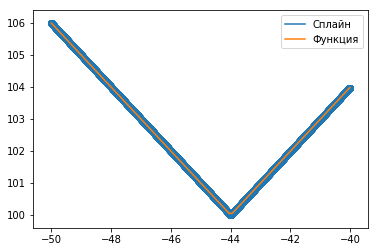

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

t = np.linspace(x[0], x[N], 100)       #задаем 100 точек для построения графика, которые будут подставляться в найденную функцию
q = np.zeros(100)

for i in range(100):                   #строим график функции сплайна
    q[i] = Spline(t[i])
plt.plot(t, q, label = 'Сплайн')

q = fi(t)                              #график исходной функции
plt.plot(t, q, label = 'Функция')

plt.scatter(x, y)

plt.legend()

In [44]:
ep = 0.0001                                    #задаем эпсилон
ddf = (Spline(x[0])-2*Spline(x[0]+ep)+Spline(x[0]+2*ep))/(ep**2)        #вторая производная
print(ddf)
df = (Spline(x[N]) - Spline(x[N]-ep))/(ep)                          #первая производная
print(df)



8.999555234368017
4.999868597508339


In [41]:
ep = 0.1
ddf = (fi(x[0])-2*fi(x[0]+ep)+fi(x[0]+2*ep))/(ep**2) 
print(ddf)
df = (fi(x[N]) - fi(x[N]-ep))/(ep)
print(df)

-1.4210854715202002e-12
0.9999999999999432


In [37]:
print(Spline(-5))             #для проверки

не в отрезке


In [38]:
print(x)            #выводим массив из узлов

[-50.         -47.53786952 -44.43754531 -39.9604508 ]
